##### Install gensim

In [2]:
pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from gensim.models import Word2Vec

In [5]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "I like eating apples and bananas.",
    "Natural language processing is a fascinating field."
]

In [6]:
from nltk.tokenize import word_tokenize

In [7]:
final_data = []
for sent in sentences:
    final_data.append(word_tokenize(sent))

In [8]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', '.']]

In [9]:
model = Word2Vec(final_data, min_count=1, vector_size=10)

In [10]:
model

In [12]:
model.wv['apples']

array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
        0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
      dtype=float32)

In [13]:
model.wv['bananas']

array([-0.08534335,  0.03207107, -0.04637997, -0.05088955,  0.03589618,
        0.05370339,  0.07769515, -0.05766506,  0.07433361,  0.06625496],
      dtype=float32)

In [14]:
model.wv['cherry']

KeyError: "Key 'cherry' not present"

In [15]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=100

In [16]:
def get_embedding(word):
    try:
        word_embedding = model.wv[word]
        print('Word Embedding for',word,'is:',word_embedding)
    except:
        print(word,'is not in vocabulary')

In [17]:
get_embedding('cherry')

cherry is not in vocabulary


In [18]:
get_embedding('fox')

Word Embedding for fox is: [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]


In [19]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
cosine_similarity(model.wv['apples'].reshape(1,-1), 
                  model.wv['bananas'].reshape(1,-1))

array([[0.18977961]], dtype=float32)

In [22]:
cosine_similarity(model.wv['dog'].reshape(1,-1), 
                  model.wv['fox'].reshape(1,-1))

array([[0.22384949]], dtype=float32)

In [24]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to /home/mitu/nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [25]:
from nltk.corpus import abc

In [26]:
sents = abc.sents()

In [27]:
len(sents)

29059

In [28]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [29]:
model = Word2Vec(sents, min_count=1, vector_size=10)

In [30]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [31]:
len(model.wv.key_to_index)

31885

In [32]:
model.wv.most_similar('company')

[('inquiry', 0.9596462249755859),
 ('group', 0.950487494468689),
 ('report', 0.950273334980011),
 ('government', 0.9499391317367554),
 ('Dept', 0.9489567279815674),
 ('Government', 0.9481151103973389),
 ('slabs', 0.9462524056434631),
 ('disband', 0.9385797381401062),
 ('research', 0.9364174604415894),
 ('Court', 0.9357333779335022)]

In [33]:
model.wv.most_similar('government')

[('research', 0.9697732329368591),
 ('investigated', 0.9640595316886902),
 ('Anticipation', 0.9575417041778564),
 ('calling', 0.9514985680580139),
 ('company', 0.9499393701553345),
 ('epic', 0.946564793586731),
 ('Court', 0.9403894543647766),
 ('findings', 0.9399920105934143),
 ('group', 0.9395702481269836),
 ('letter', 0.9388353228569031)]

In [34]:
model.wv['government']

array([-0.3710617 ,  0.8531182 ,  3.1660447 , -0.41802192, -0.30985785,
       -1.3607374 ,  0.18857893,  0.16869156, -1.6744086 , -0.89251256],
      dtype=float32)

In [35]:
model.wv['company']

array([-0.41286108,  1.474294  ,  4.727906  , -1.9212102 , -0.06262038,
       -1.595812  ,  0.9499402 , -0.9519539 , -2.9855084 , -1.2287692 ],
      dtype=float32)

In [37]:
cosine_similarity(model.wv['government'].reshape(1,-1), 
                  model.wv['company'].reshape(1,-1))[0]

array([0.9499393], dtype=float32)

##### Read the data snd train the Word2Vec

In [39]:
# data -> intents.json
# https://mitu.co.in/dataset

In [40]:
import json

In [41]:
with open('intents.json') as f:
    data = json.load(f)

In [43]:
type(data)

list

In [44]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [45]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [46]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [47]:
data[0]['responses']

['Hello, thanks for contacting us',
 'Good to see you here',
 ' Hi there, how may I assist you?']

In [48]:
import pandas as pd

In [49]:
df = pd.DataFrame(data)

In [50]:
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [52]:
df['patterns']

0    [Hi, How are you, Is any one to talk?, Hello, ...
1    [Bye, See you later, Goodbye, I will come back...
2    [Thanks for helping me, Thank your guidance, T...
3    [What hours are you open?, Tell your opening t...
4    [Can I pay using credit card?,  Can I pay usin...
Name: patterns, dtype: object

In [53]:
df['patterns'][2]

['Thanks for helping me',
 'Thank your guidance',
 "That's helpful and kind from you"]

In [55]:
df['patterns'].apply(' '.join)

0    Hi How are you Is any one to talk? Hello hi ar...
1      Bye See you later Goodbye I will come back soon
2    Thanks for helping me Thank your guidance That...
3    What hours are you open? Tell your opening tim...
4    Can I pay using credit card?  Can I pay using ...
Name: patterns, dtype: object

In [56]:
df['patterns'] = df['patterns'].apply(' '.join)

In [57]:
df

,tag,patterns,responses
0,welcome,Hi How are you Is any one to talk? Hello hi ar...,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,Bye See you later Goodbye I will come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,Thanks for helping me Thank your guidance That...,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,What hours are you open? Tell your opening tim...,"[We're open every day 8am-7pm, Our office hour..."
4,payments,Can I pay using credit card? Can I pay using ...,"[We accept VISA, Mastercard and credit card, W..."


In [58]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word
import string
stop = stopwords.words('english')

In [59]:
df['patterns'] = df['patterns'].apply(
    lambda x:' '.join(x.lower() for x in word_tokenize(x)))
df['patterns']= df['patterns'].apply(
    lambda x: ' '.join(x for x in word_tokenize(x) if x not in string.punctuation))
df['patterns']= df['patterns'].str.replace('[^\w\s]','')
df['patterns']= df['patterns'].apply(
    lambda x: ' '.join(x for x in word_tokenize(x) if  not x.isdigit()))
df['patterns'] = df['patterns'].apply(
    lambda x:' '.join(x for x in word_tokenize(x) if not x in stop))
df['patterns'] = df['patterns'].apply(
    lambda x: " ".join([Word(word).lemmatize(pos='v') for word in word_tokenize(x)]))

In [60]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thank help thank guidance 's helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hours open tell open time open time please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay use credit card pay use mastercard pay use...,"[We accept VISA, Mastercard and credit card, W..."


In [61]:
bigger_list = []
for i in df['patterns']:
    words = word_tokenize(i)
    bigger_list.append(words)

In [62]:
bigger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', "'s", 'helpful', 'kind'],
 ['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [63]:
model = Word2Vec(bigger_list, min_count=1, vector_size=2)

In [64]:
model.wv['hi']

array([0.32294363, 0.4486494 ], dtype=float32)

In [65]:
model.wv['hello']

array([-0.22683066,  0.32770258], dtype=float32)

In [66]:
model.wv.key_to_index

{'pay': 0,
 'open': 1,
 'use': 2,
 'hi': 3,
 'time': 4,
 'thank': 5,
 'hello': 6,
 'talk': 7,
 'soon': 8,
 'one': 9,
 'bye': 10,
 'see': 11,
 'later': 12,
 'goodbye': 13,
 'come': 14,
 'back': 15,
 'available': 16,
 'cash': 17,
 'help': 18,
 'mastercard': 19,
 "'s": 20,
 'helpful': 21,
 'kind': 22,
 'hours': 23,
 'tell': 24,
 'please': 25,
 'credit': 26,
 'card': 27,
 'guidance': 28}

In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
words = list(model.wv.key_to_index.keys())

In [69]:
words

['pay',
 'open',
 'use',
 'hi',
 'time',
 'thank',
 'hello',
 'talk',
 'soon',
 'one',
 'bye',
 'see',
 'later',
 'goodbye',
 'come',
 'back',
 'available',
 'cash',
 'help',
 'mastercard',
 "'s",
 'helpful',
 'kind',
 'hours',
 'tell',
 'please',
 'credit',
 'card',
 'guidance']

In [70]:
vectors = []
for word in words:
    vect = model.wv[word]
    vectors.append(list(vect))

In [71]:
vectors

[[-0.026513906, 0.01156701],
 [0.25526112, 0.45090607],
 [-0.46515337, -0.35582092],
 [0.32294363, 0.4486494],
 [-0.2507714, -0.18816859],
 [0.36877084, -0.07690762],
 [-0.22683066, 0.32770258],
 [-0.24300802, -0.09080088],
 [0.14380899, 0.049651854],
 [-0.41426075, -0.4724409],
 [0.36533156, 0.25365862],
 [0.3375778, 0.038443603],
 [0.31745085, -0.17025824],
 [-0.047435395, 0.28846955],
 [-0.37631938, -0.19679889],
 [-0.37573153, -0.046566635],
 [0.47690594, -0.36595833],
 [-0.11668843, -0.09688705],
 [0.40388986, -0.29662946],
 [0.0021348884, -0.23767537],
 [-0.48039246, 0.25032294],
 [-0.43807694, -0.21959437],
 [-0.0018065537, -0.014891196],
 [-0.38314208, 0.48097077],
 [0.24910289, 0.46165717],
 [-0.40802845, 0.22491622],
 [-0.20685782, 0.041312076],
 [0.4248581, -0.22306798],
 [0.22575632, -0.33917618]]

In [81]:
vf = pd.DataFrame(vectors, columns=['x','y'])

In [82]:
vf

,x,y
0,-0.026514,0.011567
1,0.255261,0.450906
2,-0.465153,-0.355821
3,0.322944,0.448649
4,-0.250771,-0.188169
5,0.368771,-0.076908
6,-0.226831,0.327703
7,-0.243008,-0.090801
8,0.143809,0.049652
9,-0.414261,-0.472441


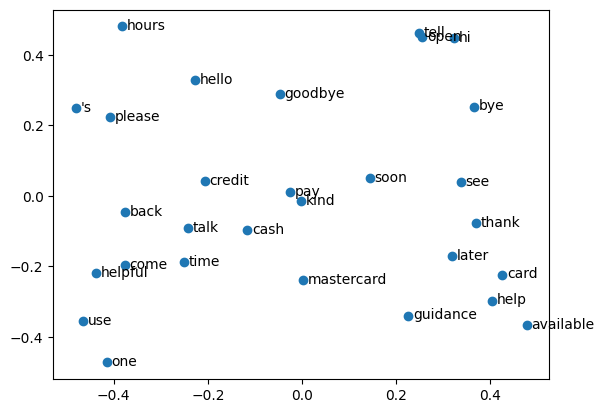

In [87]:
plt.scatter(vf['x'], vf['y'])
for i in range(len(words)):
    plt.annotate(xy=(vf.loc[i,'x']+0.01, vf.loc[i,'y']-0.01), text=words[i])

In [88]:
cosine_similarity(model.wv['credit'].reshape(1,-1), 
                  model.wv['cash'].reshape(1,-1))

array([[0.62935936]], dtype=float32)

In [89]:
cosine_similarity(model.wv['goodbye'].reshape(1,-1), 
                  model.wv['cash'].reshape(1,-1))

array([[-0.50550663]], dtype=float32)

In [90]:
model.wv.most_similar('help')

[('available', 0.9997782707214355),
 ('later', 0.99005126953125),
 ('card', 0.9887735843658447),
 ('guidance', 0.9393491148948669),
 ('thank', 0.909856379032135),
 ('see', 0.7338290810585022),
 ('mastercard', 0.5991546511650085),
 ('soon', 0.5686679482460022),
 ('kind', 0.4905630648136139),
 ('bye', 0.32444697618484497)]

In [95]:
model.wv.most_similar('help', topn=5)

[('available', 0.9997782707214355),
 ('later', 0.99005126953125),
 ('card', 0.9887735843658447),
 ('guidance', 0.9393491148948669),
 ('thank', 0.909856379032135)]

In [93]:
model.wv.doesnt_match(['use','one','come','hello','helpful'])

'hello'

In [107]:
cosine_similarity(model.wv['use'].reshape(1,-1), 
                  model.wv['one'].reshape(1,-1))

array([[0.98047864]], dtype=float32)

In [97]:
model.wv['pay']

array([-0.02651391,  0.01156701], dtype=float32)

In [98]:
model.wv['kind']

array([-0.00180655, -0.0148912 ], dtype=float32)

In [108]:
import numpy as np

# Define the word vectors
vector1 = np.array([-0.02651391,  0.01156701], dtype=np.float32)
vector2 = np.array([-0.00180655, -0.0148912 ], dtype=np.float32)

# Calculate cosine similarity
cosine_similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

print("Cosine similarity:", cosine_similarity)


Cosine similarity: -0.28656942
